In [1]:
import pandas as pd 
import os 
from skimage.transform import resize 
from skimage.io import imread 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report


import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model



/usr/lib/python3/dist-packages/paramiko/transport.py:220: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,
2024-07-05 01:32:49.494102: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-05 01:32:52.532415: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-05 01:32:52.546385: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-05 01:33:01.698248: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
# Chemin local vers le fichier des poids
local_weights_file = 'poidmodvg5.h5'

# Charger le modèle VGG16 pré-entraîné sans la couche de classification avec les poids locaux
base_model = VGG16(weights=local_weights_file, include_top=False)

# Choisir la couche dont on veut extraire les caractéristiques
modelnn = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

def preprocess_image(img_path):     
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)              
    img_array = preprocess_input(img_array)    
    return img_array



In [6]:
Categories=['bananes','avocat','mangues','ananas','pasteques'] 
flat_data_arr=[] #input array 
target_arr=[] #output array 
datadir='image-sans-fond1/' 
#path which contains all the categories of images 
for i in Categories: 
      
    print(f'loading... category : {i}') 
    path=os.path.join(datadir,i) 
    for img in os.listdir(path):         
        
        pretim= preprocess_image(os.path.join(path,img)) 
        features = modelnn.predict(pretim)      
         
        flat_data_arr.append(features.flatten()) 
        target_arr.append(i) 
    print(f'loaded category:{i} successfully') 
flat_data=np.array(flat_data_arr,dtype=object) 
target=np.array(target_arr,dtype=str)

loading... category : bananes
1/1 [==============================] - 0s 133ms/step
loaded category:bananes successfully
loading... category : avocat
1/1 [==============================] - 0s 133ms/step
loaded category:avocat successfully
loading... category : mangues
1/1 [==============================] - 0s 138ms/step
loaded category:mangues successfully
loading... category : ananas
1/1 [==============================] - 0s 132ms/step
loaded category:ananas successfully
loading... category : pasteques
1/1 [==============================] - 0s 128ms/step
loaded category:pasteques successfully


In [7]:

#dataframe 
df=pd.DataFrame(flat_data)  
df['Target']=target 
df

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.068218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.318762,bananes
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bananes
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bananes
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.639121,0.0,0.0,0.0,0.0,0.0,bananes
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bananes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pasteques
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pasteques
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pasteques
1498,0.0,51.869865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.052681,0.0,0.375175,0.0,0.0,0.0,pasteques


In [8]:
#input data  separate input and output
x=df.iloc[:,:-1]  
#output data 
y=df.iloc[:,-1]


In [9]:
# Splitting the data into training and testing sets 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, 
                                               random_state=77, 
                                               stratify=y) 

In [10]:
# Defining the parameters grid for GridSearchCV 
param_grid={'C':[0.1,1,10,100], 
            'gamma':[0.0001,0.001,0.1,1], 
            'kernel':['linear','rbf','poly']} 
  
# Creating a support vector classifier 
svc=svm.SVC(probability=True) 
  
# Creating a model using GridSearchCV with the parameters grid 
model=GridSearchCV(svc,param_grid,cv=5,scoring='accuracy')

In [11]:

# Training the model using the training data 
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [16]:
model=model.best_estimator_
# Testing the model using the testing data 
y_pred = model.predict(x_test) 
  
# Calculating the accuracy of the model 
accuracy = accuracy_score(y_pred, y_test) 
  
# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")

The model is 98.66666666666667% accurate


In [17]:
print(classification_report(y_test, y_pred, target_names=['bananes','avocat','mangues','ananas','pasteques']))


              precision    recall  f1-score   support

     bananes       1.00      1.00      1.00        60
      avocat       1.00      0.97      0.98        60
     mangues       0.98      0.98      0.98        60
      ananas       0.97      0.98      0.98        60
   pasteques       0.98      1.00      0.99        60

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



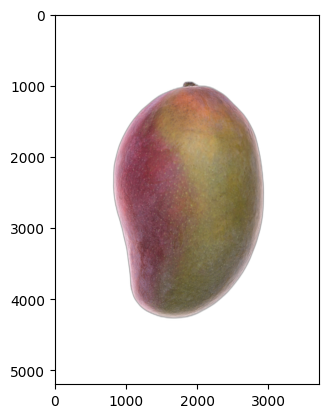

1/1 [==============================] - 0s 124ms/step
bananes = 0.019014538702695923%
avocat = 0.2390102670255758%
mangues = 0.05683504561131217%
ananas = 42.97041429729335%
pasteques = 56.714725851367035%
The predicted image is : pasteques


In [23]:
from rembg import remove 
# Fonction pour charger et prétraiter l'image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)    
    img_array = preprocess_input(img_array)
    return img_array

# Chemin de l'image à traiter
img_path = 'mango-fruit-isolated-white.jpg'

img=imread(img_path) 
img=remove(img)
plt.imshow(img) 
plt.show() 



# Charger et prétraiter l'image
img = load_and_preprocess_image(img_path)
features = modelnn.predict(img)



l=[features.flatten()] 
probability=model.predict_proba(l) 
max=0
labmax=''
for ind,val in enumerate(Categories): 
    print(f'{val} = {probability[0][ind]*100}%')
    if max<probability[0][ind]:
        max=probability[0][ind]
        labmax=val
print("The predicted image is : "f'{labmax}')

In [24]:
import joblib

In [25]:
nom_modele = "svm_model2.pkl"
joblib.dump(model, nom_modele)

['svm_model2.pkl']